In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# You can take transpose of the above table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


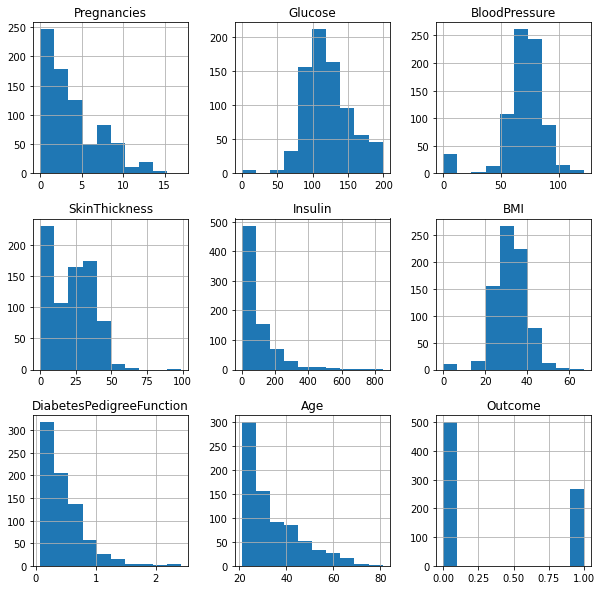

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
# We can now fill the null values with the mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)


# Doubt here, can't it be filled with median?
# Does it make a huge difference?

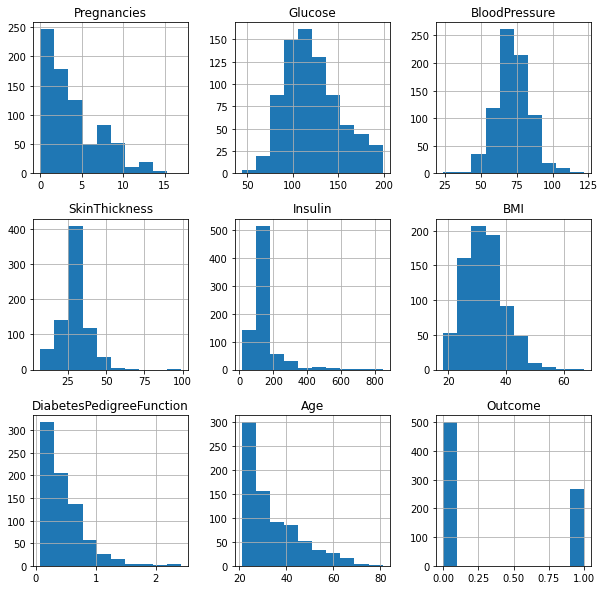

In [ ]:
p = df_copy.hist(figsize = (10,10))

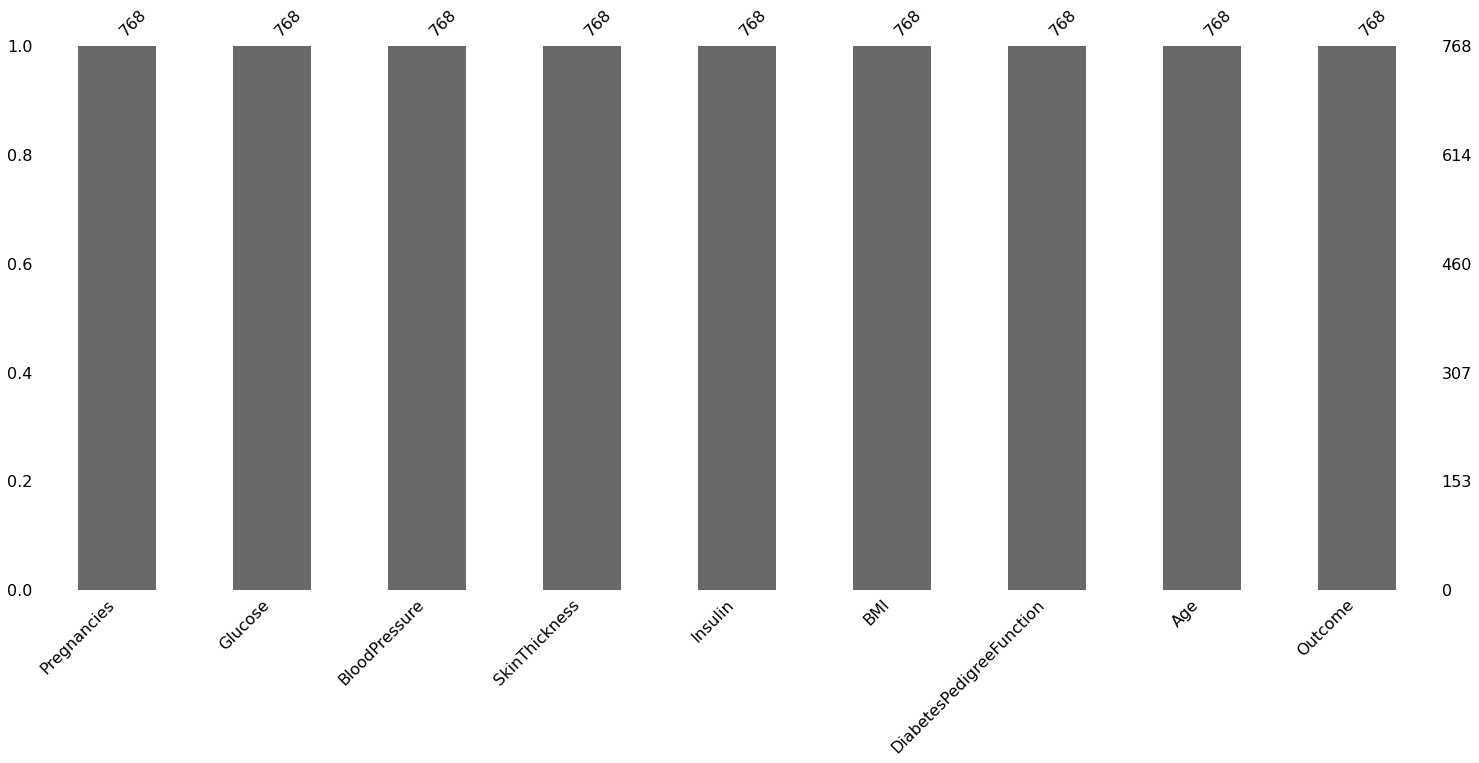

In [ ]:
# Null count analysis
p = msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


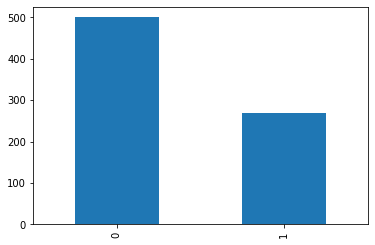

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [ ]:
#  our dataset is completely imbalanced. In fact the number of patients who are diabetic is half of the patients who are non-diabetic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


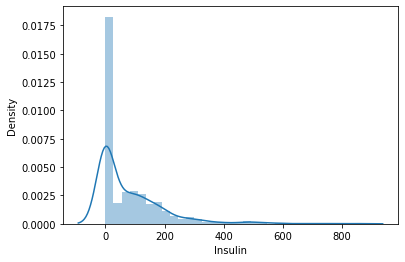

In [ ]:
sns.distplot(df['Insulin'])    
# For univariate distribution of a column

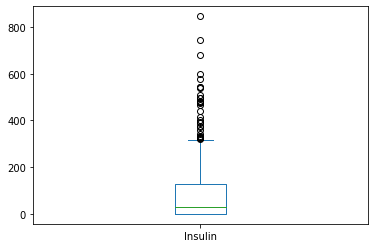

In [ ]:
# box plot for column insulin to check for outliers and noise
df['Insulin'].plot.box()

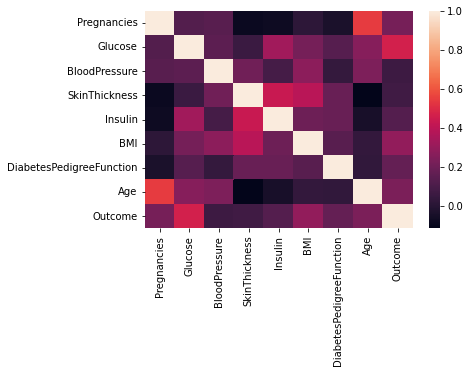

In [ ]:
p = sns.heatmap(df.corr())
# Now we can change the color of the heatmap


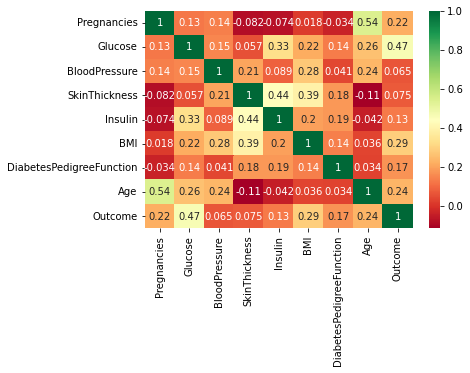

In [ ]:
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
# annote is to show values on the cell and cmap is the color of the map (red, yellow, green)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
X = df_copy.drop(['Outcome','BloodPressure', 'SkinThickness'], axis=1)
y = df_copy['Outcome']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[ 6.39947260e-01  8.65108070e-01 -3.34507888e-16  1.66291742e-01
   4.68491977e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -3.34507888e-16 -8.52531177e-01
  -3.65060778e-01 -1.90671905e-01]
 [ 1.23388019e+00  2.01581340e+00 -3.34507888e-16 -1.33283341e+00
   6.04397318e-01 -1.05584152e-01]
 ...
 [ 3.42980797e-01 -2.25789027e-02 -5.12538638e-01 -9.10749630e-01
  -6.85193357e-01 -2.75759658e-01]
 [-8.44885053e-01  1.41807574e-01 -3.34507888e-16 -3.43119717e-01
  -3.71101015e-01  1.17073215e+00]
 [-8.44885053e-01 -9.43143171e-01 -3.34507888e-16 -2.99455878e-01
  -4.73785050e-01 -8.71373930e-01]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score,classification_report, accuracy_score

In [ ]:
class ConfMatrix:
  def __init__(self, y_test, y_preds):
    self.y_test = y_test
    self.y_preds = y_preds
    self.conf_mx = confusion_matrix(y_test,y_preds)
  def plot_matrix(self):
    heat_cm = pd.DataFrame(self.conf_mx, columns=np.unique(self.y_test), index = np.unique(self.y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    sns.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 12},fmt='g')# font size
    plt.show()

# 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = gnb.predict(X_test)

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Gaussian Naive Bayes model accuracy(in %): 76.04166666666666
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       123
           1       0.68      0.62      0.65        69

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



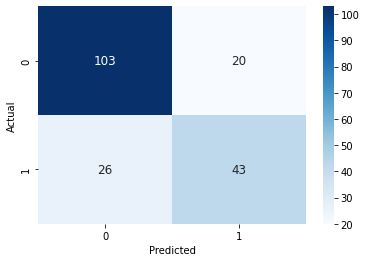

In [ ]:
gnb_cm = ConfMatrix(y_test, y_preds)
gnb_cm.plot_matrix()

In [ ]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Gaussian Naive Bayes model accuracy(in %): 76.5625

# 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = clf.predict(X_test)

In [ ]:
print("Decision Tree model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Decision Tree model accuracy(in %): 68.22916666666666
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       123
           1       0.56      0.55      0.55        69

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



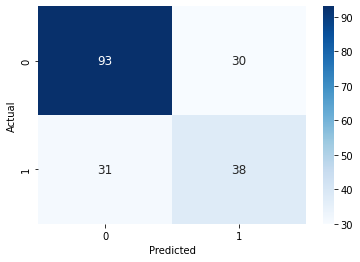

In [ ]:
dt_cm = ConfMatrix(y_test, y_preds)
dt_cm.plot_matrix()

In [ ]:
print(y_preds)

[1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 0 0 1 0]


# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=16, random_state=0)

In [ ]:
rf.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = rf.predict(X_test)

print("Random Forest model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Random Forest model accuracy(in %): 80.20833333333334
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       123
           1       0.76      0.65      0.70        69

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



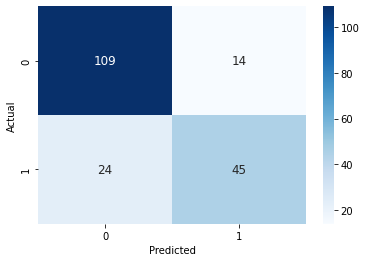

In [ ]:
rf_cm = ConfMatrix(y_test, y_preds)
rf_cm.plot_matrix()

In [ ]:
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0]


# 4. SVM

In [ ]:
from sklearn import svm
svm = svm.SVC()

In [ ]:
svm.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = svm.predict(X_test)
print("SVM accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

SVM accuracy(in %): 79.16666666666666
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       123
           1       0.78      0.58      0.67        69

    accuracy                           0.79       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.79      0.78       192



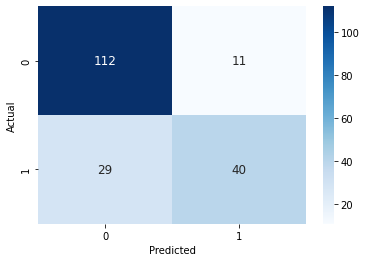

In [ ]:
svm_cm = ConfMatrix(y_test, y_preds)
svm_cm.plot_matrix()

# 5. Catboost Classifier

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(loss_function = 'Logloss',
                        eval_metric = 'BalancedAccuracy',
                        verbose = 200,
                        random_seed = 20)

cat_mod = cat.fit(X_train,y_train,
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_y_preds = cat_mod.predict(X_test)

print("catboost classifier accuracy(in %):", accuracy_score(y_test, cat_y_preds)*100)
print(classification_report(y_test, cat_y_preds))


You should provide test set for use best model. use_best_model parameter has been switched to false value.


catboost classifier accuracy(in %): 81.25
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       123
           1       0.75      0.71      0.73        69

    accuracy                           0.81       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



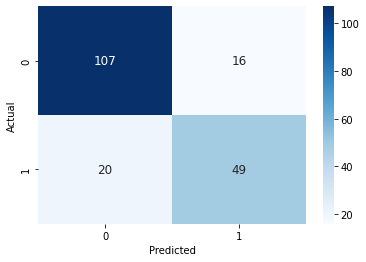

In [ ]:
cat_cm = ConfMatrix(y_test, cat_y_preds)
cat_cm.plot_matrix()

# 6. XGBoost Classifier

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_preds = xgb_cl.predict(X_test)

print("XGB classifier accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

XGB classifier accuracy(in %): 80.72916666666666
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       123
           1       0.74      0.72      0.73        69

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



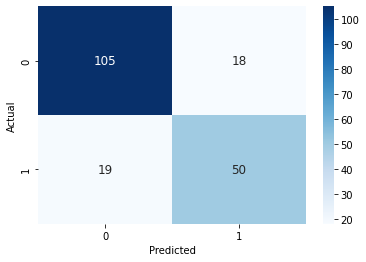

In [ ]:
xgb_cm = ConfMatrix(y_test, y_preds)
xgb_cm.plot_matrix()

# 7. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.fit(X_train, y_train)
knn_y_preds = neigh.predict(X_test)

print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
print(classification_report(y_test, knn_y_preds))

KNN accuracy(in %): 81.25
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.80      0.64      0.71        69

    accuracy                           0.81       192
   macro avg       0.81      0.77      0.79       192
weighted avg       0.81      0.81      0.81       192



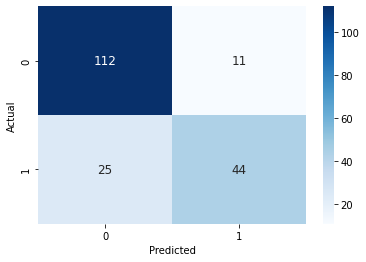

In [ ]:
knn_cm = ConfMatrix(y_test, knn_y_preds)
knn_cm.plot_matrix()

# 8. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

print("Logistic Regression accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Logistic Regression accuracy(in %): 77.60416666666666
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       123
           1       0.72      0.61      0.66        69

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.77      0.78      0.77       192



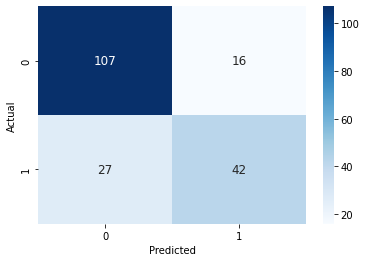

In [ ]:
lr_cm = ConfMatrix(y_test, y_preds)
lr_cm.plot_matrix()

# KNN + Catboost

In [ ]:
final_preds = np.logical_and(knn_y_preds, cat_y_preds)
# print(final_preds)
print("Accuracy(in %):", accuracy_score(y_test, final_preds)*100)
print(classification_report(y_test, final_preds))

Accuracy(in %): 81.77083333333334
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       123
           1       0.84      0.61      0.71        69

    accuracy                           0.82       192
   macro avg       0.82      0.77      0.79       192
weighted avg       0.82      0.82      0.81       192



# Hyperparameter optimisation

In [ ]:
def print_result(y_true, y_predict,model, arr):
    accuracy = metrics.accuracy_score(y_test, y_predict)
    # print("Accuracy: %.3f" % accuracy)

    precision = metrics.precision_score(y_test, y_predict)
    # print("Precision: %.3f" % precision)

    recall = metrics.recall_score(y_test, y_predict)
    # print("Recall: %.3f" % recall)

    f1 = metrics.f1_score(y_test, y_predict)
    # print("F1 Score: %.3f" % f1)
    arr[model] = {'accuracy': accuracy*100, 'precision': precision, 'recall': recall, 'f1_score': f1}
    return arr
    # return arr.append({model:{'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}})

In [ ]:
scores = {}

#1. KNN


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)
knn_y_preds = neigh.predict(X_test)

print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
print(classification_report(y_test, knn_y_preds))

KNN accuracy(in %): 81.25
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.80      0.64      0.71        69

    accuracy                           0.81       192
   macro avg       0.81      0.77      0.79       192
weighted avg       0.81      0.81      0.81       192



In [ ]:
estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': (5, 10),
    'leaf_size': (10,20,30,40,50),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}               
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    # n_jobs = -1,
    cv = cv_method
)

In [ ]:
KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN1 =KNN_1.predict(X_test)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best Score - KNN: 0.7383958020989507


In [ ]:
best_knn = KNeighborsClassifier(leaf_size=10, metric='minkowski', n_neighbors=10, p=2, weights='uniform')
best_knn.fit(X_train, y_train)
knn_y_preds = best_knn.predict(X_test)

# print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
# print(classification_report(y_test, knn_y_preds))
print_result(y_test, knn_y_preds,'knn', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386}}

#2. Naive Bayes


In [ ]:
model = GaussianNB()
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

best_nb = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

best_nb.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
best_nb.best_params_

{'var_smoothing': 0.8111308307896871}

In [ ]:
# predict the target on the test dataset
nb_y_predict= best_nb.predict(Data_transformed)

print_result(y_test, nb_y_predict, 'Naive Bayes', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897}}

# 3. Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
parameters = {
            'penalty': ['l2'], 
             'C': [0.001,0.011,0.1,1,10,100,1000],
            #  'max_iter' : [10,25]
              } 

best_lr = GridSearchCV(model, parameters,cv=cv_method,)

In [ ]:
best_lr.fit(X_train, y_train)
lr_y_predict = best_lr.predict(X_test)

print_result(y_test, lr_y_predict, 'Logistic Regression', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457}}

# 4. XGB Classifier

In [ ]:
xgb_cl = xgb.XGBClassifier()
parameters = {
            'eta':[0.1,0.3],
            'max_depth': [2,4,6],
            'min_child_weight': [0,1],
            'max_leaves':[0,1]
              } 

best_model = GridSearchCV(xgb_cl, parameters, cv=cv_method)

best_xgb = best_model.fit(X_train, y_train)
xgb_y_predict = best_xgb.predict(X_test)

print_result(y_test, xgb_y_predict, 'XGB', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457},
 'XGB': {'accuracy': 79.16666666666666,
  'precision': 0.7230769230769231,
  'recall': 0.6811594202898551,
  'f1_score': 0.7014925373134329}}

In [ ]:
best_lr.best_params_

{'C': 1, 'penalty': 'l2'}


#5. Decision tree




In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [2, 4],
    'min_samples_split': [0.1,0.3,0.5,0.9],
    'min_samples_leaf': [1,2,4]
}

best_model = GridSearchCV(dt_clf, parameters, cv=cv_method)

best_dt = best_model.fit(X_train, y_train)
dt_y_predict = best_dt.predict(X_test)
print(best_dt.best_params_)
print_result(y_test, dt_y_predict, 'Decision Tree', scores)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'splitter': 'random'}


{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457},
 'XGB': {'accuracy': 79.16666666666666,
  'precision': 0.7230769230769231,
  'recall': 0.6811594202898551,
  'f1_score': 0.7014925373134329},
 'Decision Tree': {'accuracy': 73.95833333333334,
  'precision': 0.7435897435897436,
  'recall': 0.42028985507246375,
  'f1_score': 0.537037037037037}}

#6. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
model=RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_features='sqrt',min_samples_leaf=5,random_state=0).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[107  16]
 [ 24  45]]
0.7916666666666666
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       123
           1       0.74      0.65      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [ ]:
#Randomized search cv
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(450, 511,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [450, 456, 463, 470, 477, 483, 490, 497, 504, 511], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
best_rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20, cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
best_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [450, 456, 463, 470, 477,
                                                      483, 490, 497, 504, 511],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, verbose=2)

In [ ]:
best_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 511,
 'criterion': 'gini'}

In [ ]:
rf_y_pred=best_rf.predict(X_test)

print_result(y_test,rf_y_pred,'Random_Forest', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457},
 'XGB': {'accuracy': 79.16666666666666,
  'precision': 0.7230769230769231,
  'recall': 0.6811594202898551,
  'f1_score': 0.7014925373134329},
 'Decision Tree': {'accuracy': 73.95833333333334,
  'precision': 0.7435897435897436,
  'recall': 0.42028985507246375,
  'f1_score': 0.537037037037037},
 'Random_Forest': {'accuracy': 79.6875,
  'precision': 0.7419354838709677,
  'recall': 0.6666666666666666,
  'f1_score': 0.7022900763358778}}

#7. SVM

In [ ]:
from sklearn.svm import SVC
model_params = {
        'C':[1,10,20,50],
        'kernel':['linear', 'rbf']
        }

In [ ]:
svm = SVC()
best_model = GridSearchCV(svm, model_params,cv=cv_method)

best_svm = best_model.fit(X_train, y_train)
svm_y_predict = best_svm.predict(X_test)

print_result(y_test, svm_y_predict, 'SVM', scores)

{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457},
 'XGB': {'accuracy': 79.16666666666666,
  'precision': 0.7230769230769231,
  'recall': 0.6811594202898551,
  'f1_score': 0.7014925373134329},
 'Decision Tree': {'accuracy': 73.95833333333334,
  'precision': 0.7435897435897436,
  'recall': 0.42028985507246375,
  'f1_score': 0.537037037037037},
 'Random_Forest': {'accuracy': 79.6875,
  'precision': 0.7419354838709677,
  'recall': 0.6666666666666666,
  'f1_score': 0.7022900763358778},
 'SVM': {'accuracy': 77.08333333333334,
  'precision': 0.7272727272727273,
  'recall': 0.5797101449275363,
  'f1_score': 0.6451612903225806}}

#8. Catboost

In [ ]:
cat = CatBoostClassifier()

cat_mod = cat.fit(X_train,y_train,
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_y_preds = cat_mod.predict(X_test)

print_result(y_test, cat_y_preds, 'Catboost', scores)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


{'knn': {'accuracy': 81.25,
  'precision': 0.8,
  'recall': 0.6376811594202898,
  'f1_score': 0.7096774193548386},
 'Naive Bayes': {'accuracy': 81.25,
  'precision': 0.7538461538461538,
  'recall': 0.7101449275362319,
  'f1_score': 0.7313432835820897},
 'Logistic Regression': {'accuracy': 77.60416666666666,
  'precision': 0.7241379310344828,
  'recall': 0.6086956521739131,
  'f1_score': 0.6614173228346457},
 'XGB': {'accuracy': 79.16666666666666,
  'precision': 0.7230769230769231,
  'recall': 0.6811594202898551,
  'f1_score': 0.7014925373134329},
 'Decision Tree': {'accuracy': 73.95833333333334,
  'precision': 0.7435897435897436,
  'recall': 0.42028985507246375,
  'f1_score': 0.537037037037037},
 'Random_Forest': {'accuracy': 79.6875,
  'precision': 0.7419354838709677,
  'recall': 0.6666666666666666,
  'f1_score': 0.7022900763358778},
 'SVM': {'accuracy': 77.08333333333334,
  'precision': 0.7272727272727273,
  'recall': 0.5797101449275363,
  'f1_score': 0.6451612903225806},
 'Catboost'

In [ ]:
df = pd.DataFrame.from_records(scores)
df

,Catboost,Decision Tree,Logistic Regression,Naive Bayes,Random_Forest,SVM,XGB,knn
accuracy,80.208333,73.958333,77.604167,81.250000,79.687500,77.083333,79.166667,81.250000
precision,0.754098,0.743590,0.724138,0.753846,0.741935,0.727273,0.723077,0.800000
recall,0.666667,0.420290,0.608696,0.710145,0.666667,0.579710,0.681159,0.637681
f1_score,0.707692,0.537037,0.661417,0.731343,0.702290,0.645161,0.701493,0.709677


In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('knn', best_knn), ('NB', best_nb), ('RF', best_rf)], voting='hard')
vc.fit(X_train,y_train)
vc.score(X_test,y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.796875

In [ ]:
df.to_excel('output.xlsx')

In [ ]:
X_train.shape

(576, 6)

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, 1024)
        self.dropout_1 = torch.nn.Dropout()
        self.linear_2 = torch.nn.Linear(1024, 512)
        self.dropout_2 = torch.nn.Dropout()
        self.linear_3 = torch.nn.Linear(512, 128)
        self.linear_4 = torch.nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = self.linear_1(x)
        x = self.dropout_1(x)
        x = self.linear_2(x)
        x = self.dropout_2(x)
        x = self.linear_3(x)
        outputs = torch.sigmoid(self.linear_4(x))
        return outputs

In [ ]:
epochs = 200_000
input_dim = 6 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.001

model = LogisticRegression(input_dim,output_dim)

In [ ]:
criterion = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(np.array(y_train)),torch.Tensor(np.array(y_test))

In [ ]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    iter+=1
    if iter%1000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   1%|          | 1002/200000 [00:56<2:28:46, 22.29it/s]

Iteration: 1000. 
Test - Loss: 0.4471501410007477. Accuracy: 77.08333333333333
Train -  Loss: 0.4730926752090454. Accuracy: 78.29861111111111



Training Epochs:   1%|          | 2004/200000 [01:39<2:24:58, 22.76it/s]

Iteration: 2000. 
Test - Loss: 0.4409862458705902. Accuracy: 78.125
Train -  Loss: 0.47522762417793274. Accuracy: 77.77777777777777



Training Epochs:   2%|▏         | 3002/200000 [02:23<2:22:43, 23.01it/s]

Iteration: 3000. 
Test - Loss: 0.44464218616485596. Accuracy: 77.60416666666667
Train -  Loss: 0.48037147521972656. Accuracy: 76.38888888888889



Training Epochs:   2%|▏         | 4004/200000 [03:06<2:21:17, 23.12it/s]

Iteration: 4000. 
Test - Loss: 0.43339478969573975. Accuracy: 78.125
Train -  Loss: 0.4773513972759247. Accuracy: 76.04166666666667



Training Epochs:   3%|▎         | 5003/200000 [03:49<2:21:30, 22.97it/s]

Iteration: 5000. 
Test - Loss: 0.44285857677459717. Accuracy: 79.6875
Train -  Loss: 0.47588810324668884. Accuracy: 77.25694444444444



Training Epochs:   3%|▎         | 6002/200000 [04:32<2:18:27, 23.35it/s]

Iteration: 6000. 
Test - Loss: 0.44313183426856995. Accuracy: 77.08333333333333
Train -  Loss: 0.4772384464740753. Accuracy: 76.90972222222223



Training Epochs:   4%|▎         | 7004/200000 [05:15<2:16:31, 23.56it/s]

Iteration: 7000. 
Test - Loss: 0.4397228956222534. Accuracy: 78.125
Train -  Loss: 0.4796261787414551. Accuracy: 78.125



Training Epochs:   4%|▍         | 8003/200000 [05:57<2:20:19, 22.80it/s]

Iteration: 8000. 
Test - Loss: 0.44114065170288086. Accuracy: 76.5625
Train -  Loss: 0.47915205359458923. Accuracy: 78.29861111111111



Training Epochs:   5%|▍         | 9002/200000 [06:40<2:16:07, 23.39it/s]

Iteration: 9000. 
Test - Loss: 0.4501190185546875. Accuracy: 77.08333333333333
Train -  Loss: 0.4773108661174774. Accuracy: 77.25694444444444



Training Epochs:   5%|▌         | 10004/200000 [07:22<2:14:16, 23.58it/s]

Iteration: 10000. 
Test - Loss: 0.44493016600608826. Accuracy: 78.125
Train -  Loss: 0.4794008433818817. Accuracy: 77.77777777777777



Training Epochs:   6%|▌         | 11003/200000 [08:04<2:12:49, 23.71it/s]

Iteration: 11000. 
Test - Loss: 0.43664097785949707. Accuracy: 78.125
Train -  Loss: 0.4806021451950073. Accuracy: 77.43055555555556



Training Epochs:   6%|▌         | 12002/200000 [08:47<2:16:35, 22.94it/s]

Iteration: 12000. 
Test - Loss: 0.4359091818332672. Accuracy: 77.60416666666667
Train -  Loss: 0.47559744119644165. Accuracy: 77.25694444444444



Training Epochs:   7%|▋         | 13004/200000 [09:29<2:15:25, 23.01it/s]

Iteration: 13000. 
Test - Loss: 0.4448679983615875. Accuracy: 76.5625
Train -  Loss: 0.4743528962135315. Accuracy: 77.08333333333333



Training Epochs:   7%|▋         | 14003/200000 [10:11<2:11:39, 23.55it/s]

Iteration: 14000. 
Test - Loss: 0.4418172538280487. Accuracy: 78.64583333333333
Train -  Loss: 0.4767976999282837. Accuracy: 76.90972222222223



Training Epochs:   8%|▊         | 15002/200000 [10:54<2:12:03, 23.35it/s]

Iteration: 15000. 
Test - Loss: 0.43631401658058167. Accuracy: 78.64583333333333
Train -  Loss: 0.4774543046951294. Accuracy: 77.43055555555556



Training Epochs:   8%|▊         | 16004/200000 [11:36<2:11:48, 23.27it/s]

Iteration: 16000. 
Test - Loss: 0.4469725787639618. Accuracy: 78.125
Train -  Loss: 0.48054492473602295. Accuracy: 77.60416666666667



Training Epochs:   9%|▊         | 17003/200000 [12:18<2:10:47, 23.32it/s]

Iteration: 17000. 
Test - Loss: 0.439260870218277. Accuracy: 78.64583333333333
Train -  Loss: 0.47712987661361694. Accuracy: 77.43055555555556



Training Epochs:   9%|▉         | 18002/200000 [13:01<2:12:54, 22.82it/s]

Iteration: 18000. 
Test - Loss: 0.44393131136894226. Accuracy: 77.60416666666667
Train -  Loss: 0.4760320484638214. Accuracy: 77.77777777777777



Training Epochs:  10%|▉         | 19004/200000 [13:44<2:11:48, 22.89it/s]

Iteration: 19000. 
Test - Loss: 0.43709126114845276. Accuracy: 75.52083333333333
Train -  Loss: 0.48199546337127686. Accuracy: 77.43055555555556



Training Epochs:  10%|█         | 20003/200000 [14:27<2:10:56, 22.91it/s]

Iteration: 20000. 
Test - Loss: 0.44862115383148193. Accuracy: 77.08333333333333
Train -  Loss: 0.472739577293396. Accuracy: 77.25694444444444



Training Epochs:  11%|█         | 21002/200000 [15:11<2:10:12, 22.91it/s]

Iteration: 21000. 
Test - Loss: 0.4404889643192291. Accuracy: 77.08333333333333
Train -  Loss: 0.4759413003921509. Accuracy: 77.60416666666667



Training Epochs:  11%|█         | 22004/200000 [15:54<2:10:17, 22.77it/s]

Iteration: 22000. 
Test - Loss: 0.43814635276794434. Accuracy: 77.08333333333333
Train -  Loss: 0.4719824194908142. Accuracy: 76.5625



Training Epochs:  12%|█▏        | 23003/200000 [16:37<2:08:18, 22.99it/s]

Iteration: 23000. 
Test - Loss: 0.4382983148097992. Accuracy: 78.125
Train -  Loss: 0.48001629114151. Accuracy: 77.43055555555556



Training Epochs:  12%|█▏        | 24002/200000 [17:19<2:09:05, 22.72it/s]

Iteration: 24000. 
Test - Loss: 0.44717398285865784. Accuracy: 77.60416666666667
Train -  Loss: 0.47875234484672546. Accuracy: 76.90972222222223



Training Epochs:  13%|█▎        | 25004/200000 [18:02<2:06:34, 23.04it/s]

Iteration: 25000. 
Test - Loss: 0.44526612758636475. Accuracy: 76.5625
Train -  Loss: 0.4697578251361847. Accuracy: 77.95138888888889



Training Epochs:  13%|█▎        | 26003/200000 [18:44<2:06:10, 22.98it/s]

Iteration: 26000. 
Test - Loss: 0.43673181533813477. Accuracy: 78.125
Train -  Loss: 0.4767298698425293. Accuracy: 77.60416666666667



Training Epochs:  14%|█▎        | 27002/200000 [19:27<2:08:18, 22.47it/s]

Iteration: 27000. 
Test - Loss: 0.4351499378681183. Accuracy: 78.125
Train -  Loss: 0.47664669156074524. Accuracy: 77.60416666666667



Training Epochs:  14%|█▍        | 28004/200000 [20:10<2:02:29, 23.40it/s]

Iteration: 28000. 
Test - Loss: 0.4349164068698883. Accuracy: 77.08333333333333
Train -  Loss: 0.480214923620224. Accuracy: 77.43055555555556



Training Epochs:  15%|█▍        | 29003/200000 [20:52<2:03:58, 22.99it/s]

Iteration: 29000. 
Test - Loss: 0.4406774044036865. Accuracy: 78.125
Train -  Loss: 0.47444310784339905. Accuracy: 77.60416666666667



Training Epochs:  15%|█▌        | 30002/200000 [21:35<2:03:20, 22.97it/s]

Iteration: 30000. 
Test - Loss: 0.4429697096347809. Accuracy: 78.64583333333333
Train -  Loss: 0.47806745767593384. Accuracy: 77.60416666666667



Training Epochs:  16%|█▌        | 31004/200000 [22:18<2:01:57, 23.09it/s]

Iteration: 31000. 
Test - Loss: 0.4445915222167969. Accuracy: 76.5625
Train -  Loss: 0.47959184646606445. Accuracy: 78.125



Training Epochs:  16%|█▌        | 32003/200000 [23:01<2:02:51, 22.79it/s]

Iteration: 32000. 
Test - Loss: 0.4359095096588135. Accuracy: 79.16666666666667
Train -  Loss: 0.4786323308944702. Accuracy: 77.60416666666667



Training Epochs:  17%|█▋        | 33002/200000 [23:44<1:59:25, 23.30it/s]

Iteration: 33000. 
Test - Loss: 0.4356522858142853. Accuracy: 76.5625
Train -  Loss: 0.47663959860801697. Accuracy: 77.77777777777777



Training Epochs:  17%|█▋        | 34004/200000 [24:27<2:00:12, 23.01it/s]

Iteration: 34000. 
Test - Loss: 0.44232359528541565. Accuracy: 78.125
Train -  Loss: 0.4724063277244568. Accuracy: 77.60416666666667



Training Epochs:  18%|█▊        | 35003/200000 [25:09<1:57:15, 23.45it/s]

Iteration: 35000. 
Test - Loss: 0.4466051757335663. Accuracy: 78.125
Train -  Loss: 0.47470104694366455. Accuracy: 76.73611111111111



Training Epochs:  18%|█▊        | 36002/200000 [25:52<2:02:10, 22.37it/s]

Iteration: 36000. 
Test - Loss: 0.4425297975540161. Accuracy: 77.60416666666667
Train -  Loss: 0.47319889068603516. Accuracy: 78.64583333333333



Training Epochs:  19%|█▊        | 37004/200000 [26:35<1:57:19, 23.16it/s]

Iteration: 37000. 
Test - Loss: 0.44787701964378357. Accuracy: 78.64583333333333
Train -  Loss: 0.47451460361480713. Accuracy: 77.60416666666667



Training Epochs:  19%|█▉        | 38003/200000 [27:18<1:59:41, 22.56it/s]

Iteration: 38000. 
Test - Loss: 0.43905532360076904. Accuracy: 79.16666666666667
Train -  Loss: 0.4836914837360382. Accuracy: 77.95138888888889



Training Epochs:  20%|█▉        | 39002/200000 [28:01<1:55:09, 23.30it/s]

Iteration: 39000. 
Test - Loss: 0.44801416993141174. Accuracy: 76.04166666666667
Train -  Loss: 0.4766407012939453. Accuracy: 77.60416666666667



Training Epochs:  20%|██        | 40004/200000 [28:43<1:56:11, 22.95it/s]

Iteration: 40000. 
Test - Loss: 0.4459857642650604. Accuracy: 77.08333333333333
Train -  Loss: 0.4729258716106415. Accuracy: 77.77777777777777



Training Epochs:  21%|██        | 41003/200000 [29:26<1:53:58, 23.25it/s]

Iteration: 41000. 
Test - Loss: 0.4370678961277008. Accuracy: 76.5625
Train -  Loss: 0.48321300745010376. Accuracy: 78.47222222222223



Training Epochs:  21%|██        | 42002/200000 [30:09<1:56:08, 22.67it/s]

Iteration: 42000. 
Test - Loss: 0.4454512596130371. Accuracy: 77.08333333333333
Train -  Loss: 0.4772557020187378. Accuracy: 77.25694444444444



Training Epochs:  22%|██▏       | 43004/200000 [30:52<1:53:36, 23.03it/s]

Iteration: 43000. 
Test - Loss: 0.44350406527519226. Accuracy: 76.5625
Train -  Loss: 0.47586768865585327. Accuracy: 77.25694444444444



Training Epochs:  22%|██▏       | 44003/200000 [31:34<1:52:00, 23.21it/s]

Iteration: 44000. 
Test - Loss: 0.4331148862838745. Accuracy: 77.60416666666667
Train -  Loss: 0.4762013256549835. Accuracy: 77.77777777777777



Training Epochs:  23%|██▎       | 45002/200000 [32:17<1:50:43, 23.33it/s]

Iteration: 45000. 
Test - Loss: 0.4320111572742462. Accuracy: 77.60416666666667
Train -  Loss: 0.48061397671699524. Accuracy: 77.77777777777777



Training Epochs:  23%|██▎       | 46004/200000 [32:59<1:49:19, 23.48it/s]

Iteration: 46000. 
Test - Loss: 0.43586310744285583. Accuracy: 77.60416666666667
Train -  Loss: 0.47821861505508423. Accuracy: 77.60416666666667



Training Epochs:  24%|██▎       | 47003/200000 [33:42<1:50:21, 23.11it/s]

Iteration: 47000. 
Test - Loss: 0.44804704189300537. Accuracy: 77.08333333333333
Train -  Loss: 0.4749588370323181. Accuracy: 78.125



Training Epochs:  24%|██▍       | 48002/200000 [34:25<1:49:35, 23.12it/s]

Iteration: 48000. 
Test - Loss: 0.43692275881767273. Accuracy: 78.64583333333333
Train -  Loss: 0.4766758680343628. Accuracy: 77.77777777777777



Training Epochs:  25%|██▍       | 49004/200000 [35:08<1:49:14, 23.04it/s]

Iteration: 49000. 
Test - Loss: 0.4484325647354126. Accuracy: 77.08333333333333
Train -  Loss: 0.47644710540771484. Accuracy: 77.43055555555556



Training Epochs:  25%|██▌       | 50003/200000 [35:50<1:45:43, 23.65it/s]

Iteration: 50000. 
Test - Loss: 0.4468700885772705. Accuracy: 78.125
Train -  Loss: 0.47689852118492126. Accuracy: 77.08333333333333



Training Epochs:  26%|██▌       | 51002/200000 [36:32<1:47:39, 23.07it/s]

Iteration: 51000. 
Test - Loss: 0.44447603821754456. Accuracy: 77.08333333333333
Train -  Loss: 0.4777435064315796. Accuracy: 77.77777777777777



Training Epochs:  26%|██▌       | 52004/200000 [37:15<1:44:27, 23.61it/s]

Iteration: 52000. 
Test - Loss: 0.43825197219848633. Accuracy: 79.6875
Train -  Loss: 0.47742971777915955. Accuracy: 77.95138888888889



Training Epochs:  27%|██▋       | 53003/200000 [37:58<1:48:00, 22.68it/s]

Iteration: 53000. 
Test - Loss: 0.4439655542373657. Accuracy: 77.08333333333333
Train -  Loss: 0.4819510281085968. Accuracy: 78.125



Training Epochs:  27%|██▋       | 54002/200000 [38:41<1:45:53, 22.98it/s]

Iteration: 54000. 
Test - Loss: 0.4406144917011261. Accuracy: 78.64583333333333
Train -  Loss: 0.47805362939834595. Accuracy: 77.77777777777777



Training Epochs:  28%|██▊       | 55004/200000 [39:24<1:45:39, 22.87it/s]

Iteration: 55000. 
Test - Loss: 0.44193196296691895. Accuracy: 77.60416666666667
Train -  Loss: 0.4790280759334564. Accuracy: 77.60416666666667



Training Epochs:  28%|██▊       | 56003/200000 [40:07<1:45:48, 22.68it/s]

Iteration: 56000. 
Test - Loss: 0.4478677809238434. Accuracy: 77.60416666666667
Train -  Loss: 0.47711658477783203. Accuracy: 76.90972222222223



Training Epochs:  29%|██▊       | 57002/200000 [40:50<1:44:23, 22.83it/s]

Iteration: 57000. 
Test - Loss: 0.44783082604408264. Accuracy: 77.08333333333333
Train -  Loss: 0.4737730026245117. Accuracy: 77.25694444444444



Training Epochs:  29%|██▉       | 58004/200000 [41:33<1:42:31, 23.08it/s]

Iteration: 58000. 
Test - Loss: 0.4427658021450043. Accuracy: 77.60416666666667
Train -  Loss: 0.47737041115760803. Accuracy: 77.25694444444444



Training Epochs:  30%|██▉       | 59003/200000 [42:16<1:40:45, 23.32it/s]

Iteration: 59000. 
Test - Loss: 0.44099879264831543. Accuracy: 77.60416666666667
Train -  Loss: 0.47430816292762756. Accuracy: 76.90972222222223



Training Epochs:  30%|███       | 60002/200000 [42:59<1:39:22, 23.48it/s]

Iteration: 60000. 
Test - Loss: 0.44364866614341736. Accuracy: 77.60416666666667
Train -  Loss: 0.47458615899086. Accuracy: 76.73611111111111



Training Epochs:  31%|███       | 61004/200000 [43:41<1:41:21, 22.86it/s]

Iteration: 61000. 
Test - Loss: 0.43231090903282166. Accuracy: 77.60416666666667
Train -  Loss: 0.47528403997421265. Accuracy: 77.08333333333333



Training Epochs:  31%|███       | 62003/200000 [44:24<1:39:01, 23.23it/s]

Iteration: 62000. 
Test - Loss: 0.4376052916049957. Accuracy: 77.60416666666667
Train -  Loss: 0.47431817650794983. Accuracy: 77.77777777777777



Training Epochs:  32%|███▏      | 63002/200000 [45:07<1:39:45, 22.89it/s]

Iteration: 63000. 
Test - Loss: 0.43988144397735596. Accuracy: 77.60416666666667
Train -  Loss: 0.4828653335571289. Accuracy: 76.73611111111111



Training Epochs:  32%|███▏      | 64004/200000 [45:50<1:40:58, 22.45it/s]

Iteration: 64000. 
Test - Loss: 0.44029250741004944. Accuracy: 77.60416666666667
Train -  Loss: 0.4790739417076111. Accuracy: 77.08333333333333



Training Epochs:  33%|███▎      | 65003/200000 [46:33<1:38:31, 22.84it/s]

Iteration: 65000. 
Test - Loss: 0.4456561505794525. Accuracy: 77.60416666666667
Train -  Loss: 0.47804704308509827. Accuracy: 77.08333333333333



Training Epochs:  33%|███▎      | 66002/200000 [47:16<1:37:41, 22.86it/s]

Iteration: 66000. 
Test - Loss: 0.43480384349823. Accuracy: 77.60416666666667
Train -  Loss: 0.47557246685028076. Accuracy: 77.60416666666667



Training Epochs:  34%|███▎      | 67004/200000 [47:59<1:35:53, 23.11it/s]

Iteration: 67000. 
Test - Loss: 0.43946337699890137. Accuracy: 77.60416666666667
Train -  Loss: 0.47819221019744873. Accuracy: 77.95138888888889



Training Epochs:  34%|███▍      | 68003/200000 [48:42<1:34:51, 23.19it/s]

Iteration: 68000. 
Test - Loss: 0.4391133487224579. Accuracy: 78.125
Train -  Loss: 0.47737276554107666. Accuracy: 76.73611111111111



Training Epochs:  35%|███▍      | 69002/200000 [49:25<1:34:20, 23.14it/s]

Iteration: 69000. 
Test - Loss: 0.43706074357032776. Accuracy: 77.08333333333333
Train -  Loss: 0.4697249233722687. Accuracy: 77.25694444444444



Training Epochs:  35%|███▌      | 70004/200000 [50:08<1:33:23, 23.20it/s]

Iteration: 70000. 
Test - Loss: 0.44198188185691833. Accuracy: 77.60416666666667
Train -  Loss: 0.4724465608596802. Accuracy: 77.95138888888889



Training Epochs:  36%|███▌      | 71003/200000 [50:51<1:32:51, 23.15it/s]

Iteration: 71000. 
Test - Loss: 0.4419911205768585. Accuracy: 77.60416666666667
Train -  Loss: 0.47445356845855713. Accuracy: 77.77777777777777



Training Epochs:  36%|███▌      | 72002/200000 [51:34<1:34:22, 22.60it/s]

Iteration: 72000. 
Test - Loss: 0.44204244017601013. Accuracy: 78.64583333333333
Train -  Loss: 0.4814872741699219. Accuracy: 76.73611111111111



Training Epochs:  37%|███▋      | 73004/200000 [52:18<1:32:35, 22.86it/s]

Iteration: 73000. 
Test - Loss: 0.44252416491508484. Accuracy: 78.64583333333333
Train -  Loss: 0.4773024916648865. Accuracy: 77.25694444444444



Training Epochs:  37%|███▋      | 74003/200000 [53:01<1:30:37, 23.17it/s]

Iteration: 74000. 
Test - Loss: 0.44096317887306213. Accuracy: 78.64583333333333
Train -  Loss: 0.4743126630783081. Accuracy: 77.60416666666667



Training Epochs:  38%|███▊      | 75002/200000 [53:44<1:31:36, 22.74it/s]

Iteration: 75000. 
Test - Loss: 0.44282373785972595. Accuracy: 78.64583333333333
Train -  Loss: 0.47627168893814087. Accuracy: 78.125



Training Epochs:  38%|███▊      | 76004/200000 [54:27<1:29:08, 23.18it/s]

Iteration: 76000. 
Test - Loss: 0.44951462745666504. Accuracy: 78.64583333333333
Train -  Loss: 0.4750937223434448. Accuracy: 77.25694444444444



Training Epochs:  39%|███▊      | 77003/200000 [55:10<1:28:32, 23.15it/s]

Iteration: 77000. 
Test - Loss: 0.4346874952316284. Accuracy: 77.08333333333333
Train -  Loss: 0.47433027625083923. Accuracy: 77.60416666666667



Training Epochs:  39%|███▉      | 78002/200000 [55:53<1:28:55, 22.87it/s]

Iteration: 78000. 
Test - Loss: 0.4409814774990082. Accuracy: 77.08333333333333
Train -  Loss: 0.4756903052330017. Accuracy: 76.90972222222223



Training Epochs:  40%|███▉      | 79004/200000 [56:36<1:26:47, 23.23it/s]

Iteration: 79000. 
Test - Loss: 0.44433069229125977. Accuracy: 77.60416666666667
Train -  Loss: 0.477343887090683. Accuracy: 78.125



Training Epochs:  40%|████      | 80003/200000 [57:19<1:26:02, 23.25it/s]

Iteration: 80000. 
Test - Loss: 0.44183483719825745. Accuracy: 79.16666666666667
Train -  Loss: 0.4784213602542877. Accuracy: 77.77777777777777



Training Epochs:  41%|████      | 81002/200000 [58:02<1:26:32, 22.92it/s]

Iteration: 81000. 
Test - Loss: 0.44568192958831787. Accuracy: 77.60416666666667
Train -  Loss: 0.47852468490600586. Accuracy: 76.73611111111111



Training Epochs:  41%|████      | 82004/200000 [58:46<1:26:43, 22.67it/s]

Iteration: 82000. 
Test - Loss: 0.44270023703575134. Accuracy: 78.125
Train -  Loss: 0.4743939936161041. Accuracy: 77.43055555555556



Training Epochs:  42%|████▏     | 83003/200000 [59:29<1:24:53, 22.97it/s]

Iteration: 83000. 
Test - Loss: 0.4481212794780731. Accuracy: 77.60416666666667
Train -  Loss: 0.4775559604167938. Accuracy: 77.77777777777777



Training Epochs:  42%|████▏     | 84002/200000 [1:00:12<1:24:29, 22.88it/s]

Iteration: 84000. 
Test - Loss: 0.4374762773513794. Accuracy: 78.64583333333333
Train -  Loss: 0.48051685094833374. Accuracy: 77.08333333333333



Training Epochs:  43%|████▎     | 85004/200000 [1:00:55<1:21:59, 23.37it/s]

Iteration: 85000. 
Test - Loss: 0.44442954659461975. Accuracy: 78.125
Train -  Loss: 0.4793902635574341. Accuracy: 76.90972222222223



Training Epochs:  43%|████▎     | 86003/200000 [1:01:38<1:22:28, 23.04it/s]

Iteration: 86000. 
Test - Loss: 0.4405495226383209. Accuracy: 78.64583333333333
Train -  Loss: 0.47528204321861267. Accuracy: 77.43055555555556



Training Epochs:  44%|████▎     | 87002/200000 [1:02:21<1:22:07, 22.93it/s]

Iteration: 87000. 
Test - Loss: 0.4438190758228302. Accuracy: 77.60416666666667
Train -  Loss: 0.47886642813682556. Accuracy: 77.60416666666667



Training Epochs:  44%|████▍     | 88004/200000 [1:03:03<1:21:29, 22.90it/s]

Iteration: 88000. 
Test - Loss: 0.4447127878665924. Accuracy: 77.60416666666667
Train -  Loss: 0.4748486280441284. Accuracy: 77.25694444444444



Training Epochs:  45%|████▍     | 89003/200000 [1:03:46<1:18:36, 23.53it/s]

Iteration: 89000. 
Test - Loss: 0.44577550888061523. Accuracy: 75.52083333333333
Train -  Loss: 0.47749778628349304. Accuracy: 77.60416666666667



Training Epochs:  45%|████▌     | 90002/200000 [1:04:29<1:20:53, 22.66it/s]

Iteration: 90000. 
Test - Loss: 0.4390698969364166. Accuracy: 77.08333333333333
Train -  Loss: 0.4800668954849243. Accuracy: 78.47222222222223



Training Epochs:  46%|████▌     | 91004/200000 [1:05:12<1:21:09, 22.38it/s]

Iteration: 91000. 
Test - Loss: 0.44315531849861145. Accuracy: 76.5625
Train -  Loss: 0.47425344586372375. Accuracy: 77.43055555555556



Training Epochs:  46%|████▌     | 92003/200000 [1:05:56<1:18:03, 23.06it/s]

Iteration: 92000. 
Test - Loss: 0.44484278559684753. Accuracy: 78.64583333333333
Train -  Loss: 0.4829998016357422. Accuracy: 77.08333333333333



Training Epochs:  47%|████▋     | 93002/200000 [1:06:39<1:18:10, 22.81it/s]

Iteration: 93000. 
Test - Loss: 0.4474528729915619. Accuracy: 76.04166666666667
Train -  Loss: 0.4829045534133911. Accuracy: 77.25694444444444



Training Epochs:  47%|████▋     | 94004/200000 [1:07:22<1:16:32, 23.08it/s]

Iteration: 94000. 
Test - Loss: 0.4427253305912018. Accuracy: 77.60416666666667
Train -  Loss: 0.4760669469833374. Accuracy: 77.25694444444444



Training Epochs:  48%|████▊     | 95003/200000 [1:08:05<1:16:01, 23.02it/s]

Iteration: 95000. 
Test - Loss: 0.4394368827342987. Accuracy: 77.60416666666667
Train -  Loss: 0.4877668023109436. Accuracy: 76.90972222222223



Training Epochs:  48%|████▊     | 96002/200000 [1:08:48<1:15:19, 23.01it/s]

Iteration: 96000. 
Test - Loss: 0.4449325501918793. Accuracy: 77.08333333333333
Train -  Loss: 0.47709259390830994. Accuracy: 77.43055555555556



Training Epochs:  49%|████▊     | 97004/200000 [1:09:31<1:14:13, 23.13it/s]

Iteration: 97000. 
Test - Loss: 0.4318145513534546. Accuracy: 78.125
Train -  Loss: 0.4737178087234497. Accuracy: 78.29861111111111



Training Epochs:  49%|████▉     | 98003/200000 [1:10:14<1:13:36, 23.09it/s]

Iteration: 98000. 
Test - Loss: 0.4516565501689911. Accuracy: 77.08333333333333
Train -  Loss: 0.47759661078453064. Accuracy: 77.95138888888889



Training Epochs:  50%|████▉     | 99002/200000 [1:10:58<1:13:34, 22.88it/s]

Iteration: 99000. 
Test - Loss: 0.4480864703655243. Accuracy: 76.5625
Train -  Loss: 0.47767576575279236. Accuracy: 76.90972222222223



Training Epochs:  50%|█████     | 100004/200000 [1:11:41<1:13:09, 22.78it/s]

Iteration: 100000. 
Test - Loss: 0.44256791472435. Accuracy: 77.08333333333333
Train -  Loss: 0.4788351058959961. Accuracy: 77.43055555555556



Training Epochs:  51%|█████     | 101003/200000 [1:12:25<1:13:30, 22.45it/s]

Iteration: 101000. 
Test - Loss: 0.4397679567337036. Accuracy: 78.64583333333333
Train -  Loss: 0.4807252883911133. Accuracy: 77.43055555555556



Training Epochs:  51%|█████     | 102002/200000 [1:13:08<1:13:17, 22.29it/s]

Iteration: 102000. 
Test - Loss: 0.43934234976768494. Accuracy: 78.125
Train -  Loss: 0.474538117647171. Accuracy: 77.25694444444444



Training Epochs:  52%|█████▏    | 103004/200000 [1:13:52<1:11:45, 22.53it/s]

Iteration: 103000. 
Test - Loss: 0.4405219554901123. Accuracy: 77.08333333333333
Train -  Loss: 0.47628530859947205. Accuracy: 77.60416666666667



Training Epochs:  52%|█████▏    | 104003/200000 [1:14:35<1:09:20, 23.07it/s]

Iteration: 104000. 
Test - Loss: 0.4479009807109833. Accuracy: 77.08333333333333
Train -  Loss: 0.48218461871147156. Accuracy: 77.25694444444444



Training Epochs:  53%|█████▎    | 105002/200000 [1:15:18<1:10:21, 22.50it/s]

Iteration: 105000. 
Test - Loss: 0.43508830666542053. Accuracy: 78.125
Train -  Loss: 0.48526397347450256. Accuracy: 77.08333333333333



Training Epochs:  53%|█████▎    | 106004/200000 [1:16:02<1:08:41, 22.80it/s]

Iteration: 106000. 
Test - Loss: 0.44487106800079346. Accuracy: 78.125
Train -  Loss: 0.47848451137542725. Accuracy: 77.60416666666667



Training Epochs:  54%|█████▎    | 107003/200000 [1:16:46<1:07:24, 23.00it/s]

Iteration: 107000. 
Test - Loss: 0.4402327537536621. Accuracy: 78.125
Train -  Loss: 0.4790138006210327. Accuracy: 77.08333333333333



Training Epochs:  54%|█████▍    | 108002/200000 [1:17:30<1:08:17, 22.45it/s]

Iteration: 108000. 
Test - Loss: 0.43789950013160706. Accuracy: 77.60416666666667
Train -  Loss: 0.4802381098270416. Accuracy: 77.77777777777777



Training Epochs:  55%|█████▍    | 109004/200000 [1:18:13<1:06:58, 22.65it/s]

Iteration: 109000. 
Test - Loss: 0.4409472644329071. Accuracy: 78.125
Train -  Loss: 0.47757503390312195. Accuracy: 77.08333333333333



Training Epochs:  55%|█████▌    | 110003/200000 [1:18:57<1:07:05, 22.36it/s]

Iteration: 110000. 
Test - Loss: 0.4452669322490692. Accuracy: 78.64583333333333
Train -  Loss: 0.47684478759765625. Accuracy: 77.43055555555556



Training Epochs:  56%|█████▌    | 111002/200000 [1:19:41<1:04:53, 22.86it/s]

Iteration: 111000. 
Test - Loss: 0.45335638523101807. Accuracy: 78.64583333333333
Train -  Loss: 0.47816890478134155. Accuracy: 77.25694444444444



Training Epochs:  56%|█████▌    | 112004/200000 [1:20:24<1:03:26, 23.12it/s]

Iteration: 112000. 
Test - Loss: 0.4380241632461548. Accuracy: 78.125
Train -  Loss: 0.47042274475097656. Accuracy: 78.47222222222223



Training Epochs:  57%|█████▋    | 113003/200000 [1:21:07<1:04:04, 22.63it/s]

Iteration: 113000. 
Test - Loss: 0.4375252425670624. Accuracy: 77.08333333333333
Train -  Loss: 0.4815729558467865. Accuracy: 77.43055555555556



Training Epochs:  57%|█████▋    | 114002/200000 [1:21:50<1:02:47, 22.83it/s]

Iteration: 114000. 
Test - Loss: 0.441188782453537. Accuracy: 77.08333333333333
Train -  Loss: 0.47669294476509094. Accuracy: 77.25694444444444



Training Epochs:  58%|█████▊    | 115004/200000 [1:22:34<1:01:52, 22.89it/s]

Iteration: 115000. 
Test - Loss: 0.436611533164978. Accuracy: 78.64583333333333
Train -  Loss: 0.4802743196487427. Accuracy: 77.77777777777777



Training Epochs:  58%|█████▊    | 116003/200000 [1:23:17<1:03:04, 22.20it/s]

Iteration: 116000. 
Test - Loss: 0.44432032108306885. Accuracy: 77.60416666666667
Train -  Loss: 0.4801129102706909. Accuracy: 77.43055555555556



Training Epochs:  59%|█████▊    | 117002/200000 [1:24:01<1:01:32, 22.48it/s]

Iteration: 117000. 
Test - Loss: 0.4464585781097412. Accuracy: 78.125
Train -  Loss: 0.47111791372299194. Accuracy: 76.5625



Training Epochs:  59%|█████▉    | 118004/200000 [1:24:45<1:01:37, 22.18it/s]

Iteration: 118000. 
Test - Loss: 0.44920241832733154. Accuracy: 78.125
Train -  Loss: 0.47493961453437805. Accuracy: 77.77777777777777



Training Epochs:  60%|█████▉    | 119003/200000 [1:25:29<59:08, 22.82it/s]

Iteration: 119000. 
Test - Loss: 0.4334610402584076. Accuracy: 78.64583333333333
Train -  Loss: 0.48455947637557983. Accuracy: 77.25694444444444



Training Epochs:  60%|██████    | 120002/200000 [1:26:12<58:37, 22.74it/s]

Iteration: 120000. 
Test - Loss: 0.44227755069732666. Accuracy: 77.60416666666667
Train -  Loss: 0.48286616802215576. Accuracy: 76.38888888888889



Training Epochs:  61%|██████    | 121004/200000 [1:26:56<57:45, 22.80it/s]

Iteration: 121000. 
Test - Loss: 0.4365101158618927. Accuracy: 77.60416666666667
Train -  Loss: 0.47891610860824585. Accuracy: 77.60416666666667



Training Epochs:  61%|██████    | 122003/200000 [1:27:39<57:50, 22.47it/s]

Iteration: 122000. 
Test - Loss: 0.43658968806266785. Accuracy: 78.125
Train -  Loss: 0.475092351436615. Accuracy: 77.25694444444444



Training Epochs:  62%|██████▏   | 123002/200000 [1:28:24<57:25, 22.35it/s]

Iteration: 123000. 
Test - Loss: 0.4404582679271698. Accuracy: 79.6875
Train -  Loss: 0.474810391664505. Accuracy: 77.25694444444444



Training Epochs:  62%|██████▏   | 124004/200000 [1:29:07<56:13, 22.52it/s]

Iteration: 124000. 
Test - Loss: 0.44303619861602783. Accuracy: 76.5625
Train -  Loss: 0.47423213720321655. Accuracy: 76.90972222222223



Training Epochs:  63%|██████▎   | 125003/200000 [1:29:51<55:24, 22.56it/s]

Iteration: 125000. 
Test - Loss: 0.43784835934638977. Accuracy: 78.64583333333333
Train -  Loss: 0.47397682070732117. Accuracy: 77.77777777777777



Training Epochs:  63%|██████▎   | 126002/200000 [1:30:35<55:01, 22.42it/s]

Iteration: 126000. 
Test - Loss: 0.434477835893631. Accuracy: 78.125
Train -  Loss: 0.48265546560287476. Accuracy: 77.08333333333333



Training Epochs:  64%|██████▎   | 127004/200000 [1:31:19<54:13, 22.44it/s]

Iteration: 127000. 
Test - Loss: 0.4456625282764435. Accuracy: 78.125
Train -  Loss: 0.4832349419593811. Accuracy: 78.125



Training Epochs:  64%|██████▍   | 128003/200000 [1:32:03<52:38, 22.80it/s]

Iteration: 128000. 
Test - Loss: 0.4388315975666046. Accuracy: 77.60416666666667
Train -  Loss: 0.4782624840736389. Accuracy: 77.60416666666667



Training Epochs:  65%|██████▍   | 129002/200000 [1:32:46<52:17, 22.63it/s]

Iteration: 129000. 
Test - Loss: 0.4389139413833618. Accuracy: 78.125
Train -  Loss: 0.47522708773612976. Accuracy: 77.25694444444444



Training Epochs:  65%|██████▌   | 130004/200000 [1:33:30<50:16, 23.20it/s]

Iteration: 130000. 
Test - Loss: 0.44464167952537537. Accuracy: 77.60416666666667
Train -  Loss: 0.47222083806991577. Accuracy: 77.77777777777777



Training Epochs:  66%|██████▌   | 131003/200000 [1:34:14<50:55, 22.58it/s]

Iteration: 131000. 
Test - Loss: 0.4497922658920288. Accuracy: 78.125
Train -  Loss: 0.4779275357723236. Accuracy: 76.38888888888889



Training Epochs:  66%|██████▌   | 132002/200000 [1:34:58<49:59, 22.67it/s]

Iteration: 132000. 
Test - Loss: 0.44035056233406067. Accuracy: 77.08333333333333
Train -  Loss: 0.47858646512031555. Accuracy: 78.125



Training Epochs:  67%|██████▋   | 133004/200000 [1:35:42<49:55, 22.37it/s]

Iteration: 133000. 
Test - Loss: 0.4402892589569092. Accuracy: 75.52083333333333
Train -  Loss: 0.47764450311660767. Accuracy: 77.08333333333333



Training Epochs:  67%|██████▋   | 134003/200000 [1:36:26<49:13, 22.35it/s]

Iteration: 134000. 
Test - Loss: 0.4458547532558441. Accuracy: 77.60416666666667
Train -  Loss: 0.4775281548500061. Accuracy: 77.08333333333333



Training Epochs:  68%|██████▊   | 135002/200000 [1:37:10<48:02, 22.55it/s]

Iteration: 135000. 
Test - Loss: 0.44194281101226807. Accuracy: 78.64583333333333
Train -  Loss: 0.48132801055908203. Accuracy: 76.73611111111111



Training Epochs:  68%|██████▊   | 136004/200000 [1:37:54<46:43, 22.83it/s]

Iteration: 136000. 
Test - Loss: 0.44933393597602844. Accuracy: 78.125
Train -  Loss: 0.4742775559425354. Accuracy: 77.77777777777777



Training Epochs:  69%|██████▊   | 137003/200000 [1:38:37<48:25, 21.68it/s]

Iteration: 137000. 
Test - Loss: 0.4465407431125641. Accuracy: 78.64583333333333
Train -  Loss: 0.47470128536224365. Accuracy: 77.95138888888889



Training Epochs:  69%|██████▉   | 138002/200000 [1:39:21<46:26, 22.25it/s]

Iteration: 138000. 
Test - Loss: 0.43747708201408386. Accuracy: 78.125
Train -  Loss: 0.47810328006744385. Accuracy: 77.95138888888889



Training Epochs:  70%|██████▉   | 139004/200000 [1:40:05<44:29, 22.85it/s]

Iteration: 139000. 
Test - Loss: 0.4438260495662689. Accuracy: 79.16666666666667
Train -  Loss: 0.4752388596534729. Accuracy: 77.43055555555556



Training Epochs:  70%|███████   | 140003/200000 [1:40:49<44:57, 22.24it/s]

Iteration: 140000. 
Test - Loss: 0.44388672709465027. Accuracy: 79.6875
Train -  Loss: 0.47709718346595764. Accuracy: 77.77777777777777



Training Epochs:  71%|███████   | 141002/200000 [1:41:33<43:46, 22.47it/s]

Iteration: 141000. 
Test - Loss: 0.4453282356262207. Accuracy: 77.60416666666667
Train -  Loss: 0.4738394320011139. Accuracy: 77.95138888888889



Training Epochs:  71%|███████   | 142004/200000 [1:42:17<43:45, 22.09it/s]

Iteration: 142000. 
Test - Loss: 0.44338762760162354. Accuracy: 77.08333333333333
Train -  Loss: 0.4809683561325073. Accuracy: 75.86805555555556



Training Epochs:  72%|███████▏  | 143003/200000 [1:43:01<42:40, 22.26it/s]

Iteration: 143000. 
Test - Loss: 0.4480609893798828. Accuracy: 78.125
Train -  Loss: 0.47651591897010803. Accuracy: 77.43055555555556



Training Epochs:  72%|███████▏  | 144002/200000 [1:43:46<42:11, 22.12it/s]

Iteration: 144000. 
Test - Loss: 0.4473479092121124. Accuracy: 77.08333333333333
Train -  Loss: 0.48447057604789734. Accuracy: 76.5625



Training Epochs:  73%|███████▎  | 145004/200000 [1:44:31<41:03, 22.32it/s]

Iteration: 145000. 
Test - Loss: 0.45381656289100647. Accuracy: 77.08333333333333
Train -  Loss: 0.47926345467567444. Accuracy: 78.125



Training Epochs:  73%|███████▎  | 146003/200000 [1:45:14<39:13, 22.94it/s]

Iteration: 146000. 
Test - Loss: 0.44130027294158936. Accuracy: 77.08333333333333
Train -  Loss: 0.4815457761287689. Accuracy: 77.25694444444444



Training Epochs:  74%|███████▎  | 147002/200000 [1:45:59<39:39, 22.27it/s]

Iteration: 147000. 
Test - Loss: 0.4399692118167877. Accuracy: 78.125
Train -  Loss: 0.4833773076534271. Accuracy: 76.5625



Training Epochs:  74%|███████▍  | 148004/200000 [1:46:43<38:40, 22.41it/s]

Iteration: 148000. 
Test - Loss: 0.43879184126853943. Accuracy: 78.64583333333333
Train -  Loss: 0.47695276141166687. Accuracy: 77.25694444444444



Training Epochs:  75%|███████▍  | 149003/200000 [1:47:27<38:19, 22.18it/s]

Iteration: 149000. 
Test - Loss: 0.44168928265571594. Accuracy: 76.5625
Train -  Loss: 0.4808003008365631. Accuracy: 78.47222222222223



Training Epochs:  75%|███████▌  | 150002/200000 [1:48:11<36:33, 22.80it/s]

Iteration: 150000. 
Test - Loss: 0.4467635452747345. Accuracy: 78.125
Train -  Loss: 0.4725494980812073. Accuracy: 77.77777777777777



Training Epochs:  76%|███████▌  | 151004/200000 [1:48:55<36:04, 22.63it/s]

Iteration: 151000. 
Test - Loss: 0.44306328892707825. Accuracy: 77.08333333333333
Train -  Loss: 0.4808894693851471. Accuracy: 77.95138888888889



Training Epochs:  76%|███████▌  | 152003/200000 [1:49:38<35:45, 22.37it/s]

Iteration: 152000. 
Test - Loss: 0.44875743985176086. Accuracy: 76.5625
Train -  Loss: 0.48178040981292725. Accuracy: 77.43055555555556



Training Epochs:  77%|███████▋  | 153002/200000 [1:50:22<34:59, 22.38it/s]

Iteration: 153000. 
Test - Loss: 0.4351918399333954. Accuracy: 77.08333333333333
Train -  Loss: 0.48201268911361694. Accuracy: 78.64583333333333



Training Epochs:  77%|███████▋  | 154004/200000 [1:51:06<33:42, 22.74it/s]

Iteration: 154000. 
Test - Loss: 0.4484840929508209. Accuracy: 78.125
Train -  Loss: 0.47603777050971985. Accuracy: 76.5625



Training Epochs:  78%|███████▊  | 155003/200000 [1:51:49<32:43, 22.92it/s]

Iteration: 155000. 
Test - Loss: 0.4399416446685791. Accuracy: 76.5625
Train -  Loss: 0.4735148847103119. Accuracy: 77.95138888888889



Training Epochs:  78%|███████▊  | 156002/200000 [1:52:32<32:21, 22.66it/s]

Iteration: 156000. 
Test - Loss: 0.43737921118736267. Accuracy: 77.60416666666667
Train -  Loss: 0.47237831354141235. Accuracy: 77.43055555555556



Training Epochs:  79%|███████▊  | 157004/200000 [1:53:16<31:29, 22.76it/s]

Iteration: 157000. 
Test - Loss: 0.44543156027793884. Accuracy: 78.64583333333333
Train -  Loss: 0.47489261627197266. Accuracy: 77.60416666666667



Training Epochs:  79%|███████▉  | 158003/200000 [1:54:00<30:37, 22.86it/s]

Iteration: 158000. 
Test - Loss: 0.44796058535575867. Accuracy: 78.125
Train -  Loss: 0.48109281063079834. Accuracy: 77.08333333333333



Training Epochs:  80%|███████▉  | 159002/200000 [1:54:44<30:17, 22.56it/s]

Iteration: 159000. 
Test - Loss: 0.4394863545894623. Accuracy: 77.08333333333333
Train -  Loss: 0.4796791672706604. Accuracy: 78.29861111111111



Training Epochs:  80%|████████  | 160004/200000 [1:55:27<29:54, 22.29it/s]

Iteration: 160000. 
Test - Loss: 0.4498847424983978. Accuracy: 77.08333333333333
Train -  Loss: 0.479556143283844. Accuracy: 77.77777777777777



Training Epochs:  81%|████████  | 161003/200000 [1:56:11<29:01, 22.39it/s]

Iteration: 161000. 
Test - Loss: 0.43309763073921204. Accuracy: 78.125
Train -  Loss: 0.4725245237350464. Accuracy: 78.125



Training Epochs:  81%|████████  | 162002/200000 [1:56:55<27:40, 22.88it/s]

Iteration: 162000. 
Test - Loss: 0.4425531327724457. Accuracy: 77.08333333333333
Train -  Loss: 0.4801555275917053. Accuracy: 77.77777777777777



Training Epochs:  82%|████████▏ | 163004/200000 [1:57:39<27:00, 22.83it/s]

Iteration: 163000. 
Test - Loss: 0.44228896498680115. Accuracy: 77.60416666666667
Train -  Loss: 0.47646841406822205. Accuracy: 76.73611111111111



Training Epochs:  82%|████████▏ | 164003/200000 [1:58:22<26:53, 22.32it/s]

Iteration: 164000. 
Test - Loss: 0.4330911636352539. Accuracy: 77.08333333333333
Train -  Loss: 0.48349565267562866. Accuracy: 76.5625



Training Epochs:  83%|████████▎ | 165002/200000 [1:59:06<25:53, 22.53it/s]

Iteration: 165000. 
Test - Loss: 0.4453323781490326. Accuracy: 77.08333333333333
Train -  Loss: 0.4729410409927368. Accuracy: 77.25694444444444



Training Epochs:  83%|████████▎ | 166004/200000 [1:59:50<26:25, 21.44it/s]

Iteration: 166000. 
Test - Loss: 0.4401117265224457. Accuracy: 78.125
Train -  Loss: 0.4821453094482422. Accuracy: 77.60416666666667



Training Epochs:  84%|████████▎ | 167003/200000 [2:00:34<24:08, 22.78it/s]

Iteration: 167000. 
Test - Loss: 0.45299068093299866. Accuracy: 78.125
Train -  Loss: 0.48027393221855164. Accuracy: 77.08333333333333



Training Epochs:  84%|████████▍ | 168002/200000 [2:01:17<23:42, 22.49it/s]

Iteration: 168000. 
Test - Loss: 0.44382134079933167. Accuracy: 76.5625
Train -  Loss: 0.4838702380657196. Accuracy: 76.38888888888889



Training Epochs:  85%|████████▍ | 169004/200000 [2:02:02<22:57, 22.50it/s]

Iteration: 169000. 
Test - Loss: 0.4505596160888672. Accuracy: 77.08333333333333
Train -  Loss: 0.48218950629234314. Accuracy: 77.43055555555556



Training Epochs:  85%|████████▌ | 170003/200000 [2:02:46<21:47, 22.94it/s]

Iteration: 170000. 
Test - Loss: 0.44548967480659485. Accuracy: 78.125
Train -  Loss: 0.47942957282066345. Accuracy: 76.73611111111111



Training Epochs:  86%|████████▌ | 171002/200000 [2:03:29<22:00, 21.95it/s]

Iteration: 171000. 
Test - Loss: 0.44396719336509705. Accuracy: 78.64583333333333
Train -  Loss: 0.4763706922531128. Accuracy: 77.95138888888889



Training Epochs:  86%|████████▌ | 172004/200000 [2:04:13<20:46, 22.47it/s]

Iteration: 172000. 
Test - Loss: 0.4524865448474884. Accuracy: 77.60416666666667
Train -  Loss: 0.4728754460811615. Accuracy: 77.43055555555556



Training Epochs:  87%|████████▋ | 173003/200000 [2:04:57<19:43, 22.81it/s]

Iteration: 173000. 
Test - Loss: 0.43826594948768616. Accuracy: 77.08333333333333
Train -  Loss: 0.47910457849502563. Accuracy: 77.25694444444444



Training Epochs:  87%|████████▋ | 174002/200000 [2:05:40<19:06, 22.68it/s]

Iteration: 174000. 
Test - Loss: 0.43778398633003235. Accuracy: 78.64583333333333
Train -  Loss: 0.47433629631996155. Accuracy: 77.95138888888889



Training Epochs:  88%|████████▊ | 175004/200000 [2:06:25<18:51, 22.09it/s]

Iteration: 175000. 
Test - Loss: 0.44277235865592957. Accuracy: 76.5625
Train -  Loss: 0.4787150025367737. Accuracy: 77.95138888888889



Training Epochs:  88%|████████▊ | 176003/200000 [2:07:09<17:46, 22.51it/s]

Iteration: 176000. 
Test - Loss: 0.4425649642944336. Accuracy: 77.08333333333333
Train -  Loss: 0.4795833230018616. Accuracy: 77.25694444444444



Training Epochs:  89%|████████▊ | 177002/200000 [2:07:53<17:17, 22.16it/s]

Iteration: 177000. 
Test - Loss: 0.4393804967403412. Accuracy: 78.64583333333333
Train -  Loss: 0.47623729705810547. Accuracy: 77.77777777777777



Training Epochs:  89%|████████▉ | 178004/200000 [2:08:37<16:32, 22.16it/s]

Iteration: 178000. 
Test - Loss: 0.4528469741344452. Accuracy: 76.5625
Train -  Loss: 0.47498422861099243. Accuracy: 77.60416666666667



Training Epochs:  90%|████████▉ | 179003/200000 [2:09:21<15:18, 22.87it/s]

Iteration: 179000. 
Test - Loss: 0.4375734329223633. Accuracy: 77.08333333333333
Train -  Loss: 0.47718778252601624. Accuracy: 77.25694444444444



Training Epochs:  90%|█████████ | 180002/200000 [2:10:04<14:34, 22.86it/s]

Iteration: 180000. 
Test - Loss: 0.44880545139312744. Accuracy: 78.125
Train -  Loss: 0.47792142629623413. Accuracy: 77.08333333333333



Training Epochs:  91%|█████████ | 181004/200000 [2:10:47<14:24, 21.97it/s]

Iteration: 181000. 
Test - Loss: 0.45004144310951233. Accuracy: 78.125
Train -  Loss: 0.47654902935028076. Accuracy: 77.08333333333333



Training Epochs:  91%|█████████ | 182003/200000 [2:11:31<13:25, 22.34it/s]

Iteration: 182000. 
Test - Loss: 0.44649389386177063. Accuracy: 77.08333333333333
Train -  Loss: 0.47910457849502563. Accuracy: 77.25694444444444



Training Epochs:  92%|█████████▏| 183002/200000 [2:12:15<12:31, 22.61it/s]

Iteration: 183000. 
Test - Loss: 0.43765321373939514. Accuracy: 77.60416666666667
Train -  Loss: 0.4827916920185089. Accuracy: 76.73611111111111



Training Epochs:  92%|█████████▏| 184004/200000 [2:12:59<11:39, 22.87it/s]

Iteration: 184000. 
Test - Loss: 0.4328179657459259. Accuracy: 78.64583333333333
Train -  Loss: 0.47724246978759766. Accuracy: 76.38888888888889



Training Epochs:  93%|█████████▎| 185003/200000 [2:13:42<11:08, 22.42it/s]

Iteration: 185000. 
Test - Loss: 0.43922850489616394. Accuracy: 78.64583333333333
Train -  Loss: 0.4737755358219147. Accuracy: 78.125



Training Epochs:  93%|█████████▎| 186002/200000 [2:14:26<10:18, 22.65it/s]

Iteration: 186000. 
Test - Loss: 0.4362199008464813. Accuracy: 78.125
Train -  Loss: 0.4758334159851074. Accuracy: 77.25694444444444



Training Epochs:  94%|█████████▎| 187004/200000 [2:15:10<09:35, 22.58it/s]

Iteration: 187000. 
Test - Loss: 0.4408997595310211. Accuracy: 78.125
Train -  Loss: 0.47662413120269775. Accuracy: 77.95138888888889



Training Epochs:  94%|█████████▍| 188003/200000 [2:15:54<08:50, 22.59it/s]

Iteration: 188000. 
Test - Loss: 0.44784340262413025. Accuracy: 78.125
Train -  Loss: 0.4799605906009674. Accuracy: 77.43055555555556



Training Epochs:  95%|█████████▍| 189002/200000 [2:16:38<08:15, 22.18it/s]

Iteration: 189000. 
Test - Loss: 0.44111064076423645. Accuracy: 78.64583333333333
Train -  Loss: 0.47669491171836853. Accuracy: 77.43055555555556



Training Epochs:  95%|█████████▌| 190004/200000 [2:17:21<07:19, 22.77it/s]

Iteration: 190000. 
Test - Loss: 0.4388609826564789. Accuracy: 77.60416666666667
Train -  Loss: 0.47627872228622437. Accuracy: 77.77777777777777



Training Epochs:  96%|█████████▌| 191003/200000 [2:18:04<06:34, 22.78it/s]

Iteration: 191000. 
Test - Loss: 0.4440275728702545. Accuracy: 76.5625
Train -  Loss: 0.47729936242103577. Accuracy: 77.43055555555556



Training Epochs:  96%|█████████▌| 192002/200000 [2:18:48<05:46, 23.08it/s]

Iteration: 192000. 
Test - Loss: 0.4493735134601593. Accuracy: 78.125
Train -  Loss: 0.47804388403892517. Accuracy: 77.08333333333333



Training Epochs:  97%|█████████▋| 193004/200000 [2:19:31<05:02, 23.13it/s]

Iteration: 193000. 
Test - Loss: 0.4405885636806488. Accuracy: 77.60416666666667
Train -  Loss: 0.47819316387176514. Accuracy: 77.25694444444444



Training Epochs:  97%|█████████▋| 194003/200000 [2:20:14<04:18, 23.22it/s]

Iteration: 194000. 
Test - Loss: 0.4447571337223053. Accuracy: 76.5625
Train -  Loss: 0.47664034366607666. Accuracy: 76.90972222222223



Training Epochs:  98%|█████████▊| 195002/200000 [2:20:56<03:35, 23.19it/s]

Iteration: 195000. 
Test - Loss: 0.44537171721458435. Accuracy: 78.125
Train -  Loss: 0.47814327478408813. Accuracy: 77.43055555555556



Training Epochs:  98%|█████████▊| 196004/200000 [2:21:40<02:53, 23.02it/s]

Iteration: 196000. 
Test - Loss: 0.446041464805603. Accuracy: 77.60416666666667
Train -  Loss: 0.47326067090034485. Accuracy: 76.73611111111111



Training Epochs:  99%|█████████▊| 197003/200000 [2:22:23<02:09, 23.09it/s]

Iteration: 197000. 
Test - Loss: 0.4377702474594116. Accuracy: 78.125
Train -  Loss: 0.48101747035980225. Accuracy: 78.125



Training Epochs:  99%|█████████▉| 198002/200000 [2:23:06<01:27, 22.95it/s]

Iteration: 198000. 
Test - Loss: 0.44591498374938965. Accuracy: 77.08333333333333
Train -  Loss: 0.47659480571746826. Accuracy: 76.90972222222223



Training Epochs: 100%|█████████▉| 199004/200000 [2:23:49<00:42, 23.22it/s]

Iteration: 199000. 
Test - Loss: 0.44300565123558044. Accuracy: 78.64583333333333
Train -  Loss: 0.4809073209762573. Accuracy: 76.90972222222223



Training Epochs: 100%|██████████| 200000/200000 [2:24:32<00:00, 23.06it/s]

Iteration: 200000. 
Test - Loss: 0.439322829246521. Accuracy: 77.08333333333333
Train -  Loss: 0.47536182403564453. Accuracy: 77.08333333333333

